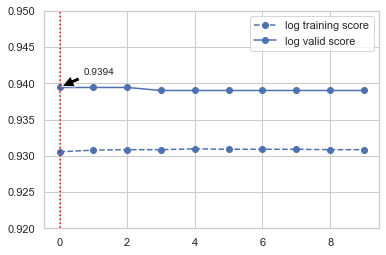

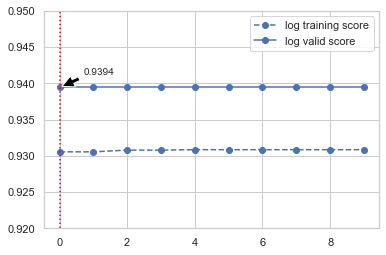

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************


In [18]:
%run Data_preprocessing_realmean跑这个.py

In [38]:
from sklearn.linear_model import LogisticRegression
a=['lbfgs','newton-cg','sag','saga']
for i in a:
    clf1 = LogisticRegression(multi_class='multinomial',
                        solver=i,
                        max_iter=1000,
                        C=1e10)
    clf1.fit(X_train_selected_t1_norm,y_train_t1_value)
    clf1.coef_
    print(clf1.score(X_valid_selected_t1_norm,y_valid_t1_value))

0.9352548036758563
0.9352548036758563
0.9352548036758563
0.9352548036758563


In [39]:
print(clf1.score(X_valid_selected_t1_norm,y_valid_t1_value))

0.9352548036758563


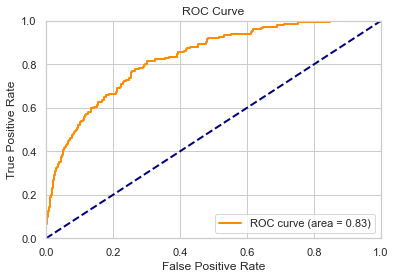

In [40]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_valid_t1_score=clf1.decision_function(X_valid_selected_t1_norm)
fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_t1_score)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [41]:
y_test_t1_pred=clf1.predict(X_test_selected_t1_norm)
print(y_test_t1_pred)
pd.DataFrame(y_test_t1_pred).to_excel(excel_writer="/Users/xiexienan/Desktop/prediction data1.xlsx")

[0 0 0 ... 0 0 0]


In [42]:
from sklearn import linear_model

linear_reg2= linear_model.LinearRegression()
linear_reg2.fit(X_train_selected_t2_norm,y_train_t2_value)
linear_reg2.coef_

array([-1.77085028e-02, -1.04328722e-01, -5.22054655e-02,  5.49905096e-02,
        1.14879443e-02,  1.19394418e-02, -2.40997606e-03,  1.22222944e-02,
        1.58782320e-01, -1.47420615e-02,  3.79198554e-03,  3.81656237e-02,
       -4.45668125e-02,  7.02213856e-03,  5.30578190e-02, -7.35893208e-02,
       -4.54805123e-01,  4.20012801e-02, -4.09751385e-01,  5.50902291e-02,
        6.11255504e-02, -1.13680545e-01,  6.15629069e-02, -6.03361036e-02,
       -2.05107860e-02, -6.90762376e-02,  4.82127138e-02,  6.21733090e-01,
        2.50440679e-01, -2.13012102e-01, -1.31186033e-01,  1.07128210e-02,
        9.24276980e-03,  2.54418441e-02, -4.83566976e-02, -7.11006586e-02,
        7.06885037e-02,  1.16422040e-01,  3.62077431e-02,  1.43006411e-02,
       -4.51646615e-02,  1.01311412e-01, -3.00466324e-04, -3.88867487e-03,
        1.21771252e-01, -2.54387341e-02, -2.45522172e-02, -1.01237737e-02,
        3.63847340e-02,  6.33952200e-02,  3.11809570e-02,  2.36944581e-02,
        1.91744737e-03, -

In [43]:
import math
y_valid_t2_pred=linear_reg2.predict(X_valid_selected_t2_norm)
sse = np.sum((y_valid_t2_pred-y_valid_t2_value)**2)
y_valid_t2_value.shape
mse=sse/y_valid_t2_value.shape
print(math.sqrt(mse))


1.8823294089663103


In [44]:
y_test_t2_pre=linear_reg2.predict(X_test_selected_t2_norm)
print(y_test_t2_pre)
pd.DataFrame(y_test_t2_pre).to_excel(excel_writer="/Users/xiexienan/Desktop/prediction data2.xlsx")

[3.43971935 2.57558622 2.47627679 ... 3.02498392 3.25962579 3.48024265]
